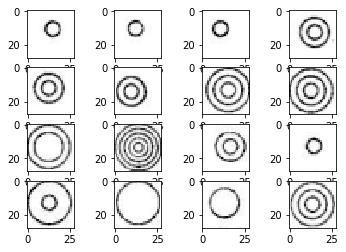

In [2]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,0],cmap='gray')

In [2]:
n=0
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,3,6])
#M12,a12=load(data[:,:,m,12])
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,n],50,3,8)

Step 1, Minibatch Loss= 16052.0898, Train Accuracy= 0.000
Step 2, Minibatch Loss= 1147.5276, Train Accuracy= 0.750
Step 3, Minibatch Loss= 166.1824, Train Accuracy= 0.875
Step 4, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 5, Minibatch Loss= 3464.2522, Train Accuracy= 0.250
Step 6, Minibatch Loss= 13533.5078, Train Accuracy= 0.000
Step 7, Minibatch Loss= 11845.3955, Train Accuracy= 0.000
Step 8, Minibatch Loss= 10957.2637, Train Accuracy= 0.000
Step 9, Minibatch Loss= 2887.2422, Train Accuracy= 0.125
Step 10, Minibatch Loss= 392.4342, Train Accuracy= 0.750
Step 11, Minibatch Loss= 6559.1787, Train Accuracy= 0.000
Step 12, Minibatch Loss= 154.8667, Train Accuracy= 0.875
Step 13, Minibatch Loss= 1086.0334, Train Accuracy= 0.500
Step 14, Minibatch Loss= 2901.9121, Train Accuracy= 0.125
Step 15, Minibatch Loss= 777.4294, Train Accuracy= 0.625
Step 16, Minibatch Loss= 2635.1670, Train Accuracy= 0.250
Step 17, Minibatch Loss= 1400.0782, Train Accuracy= 0.375
Step 18, Minibatch Loss= 1

In [3]:
import tensorflow as tf
from convo import conv2d, maxpool2d
import numpy as np
def forward(pic,w1,w2):
    II=np.zeros((16,6*7*7))
    with tf.Session() as sess:
        for i in range (0,16):
            p1=tf.reshape(pic[:,:,i].astype('float64').reshape(1,28*28)/255 , shape=[-1, 28,28 , 1])
            I=conv2d(p1, w1)
            I=maxpool2d(I,k=2)
            I1 = conv2d(I, w2)
            I1=maxpool2d(I1,k=2)
            I1=tf.reshape(I1,[-1,6*7*7]).eval()
            II[i,:]=I1
    return II


# def compare(I1,II2):
#     E=np.zeros(6)
#     for i in range (0,6):
#         E[i]=np.abs(II2[i,:]-I1).sum()
#     E1=np.zeros(6)
#     for i in range (0,6):
#         E1[i]=(II2[i,:]-I1).sum()
#     return E,E1

In [17]:
II=forward(data[:,:,:,0],w1,w2)

In [18]:
II.shape

(16, 294)

In [19]:
error01=II[1,:]-II[0,:]
error12=II[2,:]-II[1,:]
error34=II[4,:]-II[3,:]
error54=II[5,:]-II[4,:]
error67=II[7,:]-II[6,:]
error78=np.zeros((8,294))
for i in range (0,8):
    error78[i,:]=II[8+i,:]-II[7,:]

In [23]:
E1=error01-error34
E2=error34-error54
E3=np.zeros((8,294))
for i in range (0,8):
    E3[i,:]=error67-error78[i,:]

In [27]:
EE1=E2-E1
EE2=np.zeros((8,294))
for i in range (0,8):
    EE2[i,:]=E3[i,:]-E2

In [29]:
np.abs(EE2.sum(axis=1))

array([168.58263961, 288.76965447, 226.64491387, 318.24302075,
       183.25958212, 265.01503549, 277.30093852,  10.87134598])

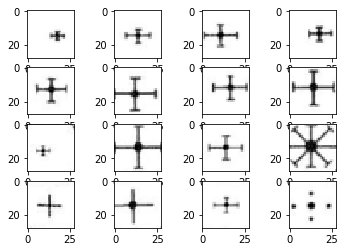

In [6]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,1],cmap='gray')

In [11]:
n=0
from con import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,3,6])
#M12,a12=load(data[:,:,m,12])
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,4,1])

Step 1, Minibatch Loss= 320.9716, Train Accuracy= 0.625
Step 2, Minibatch Loss= 224.2199, Train Accuracy= 0.750
Step 3, Minibatch Loss= 252.6390, Train Accuracy= 0.875
Step 4, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 5, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 6, Minibatch Loss= 0.0000, Train Accuracy= 1.000
('Testing Accuracy:', 1.0)


In [12]:
II=forward(data[:,:,:,0],w1,w2)
error01=II[1,:]-II[0,:]
error12=II[2,:]-II[1,:]
error34=II[4,:]-II[3,:]
error54=II[5,:]-II[4,:]
error67=II[7,:]-II[6,:]
error78=np.zeros((8,294))
for i in range (0,8):
    error78[i,:]=II[8+i,:]-II[7,:]
E1=error01-error34
E2=error34-error54
E3=np.zeros((8,294))
for i in range (0,8):
    E3[i,:]=error67-error78[i,:]
EE1=E2-E1
EE2=np.zeros((8,294))
for i in range (0,8):
    EE2[i,:]=E3[i,:]-E2
np.abs(EE2.sum(axis=1))

array([59.51210469, 38.72615168, 84.98694652, 86.48531057, 55.50911804,
       61.02533892, 85.77912377, 59.73604605])

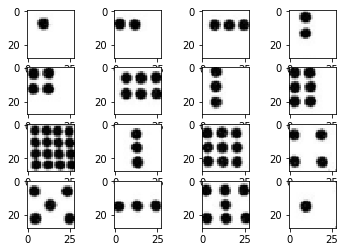

In [31]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,2],cmap='gray')

In [2]:
n=0
from con import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,3,6])
#M12,a12=load(data[:,:,m,12])
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,0,2])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Step 1, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 2, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 3, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 4, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 5, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 6, Minibatch Loss= 0.0000, Train Accuracy= 1.000
('Testing Accuracy:', 1.0)


In [4]:
II=forward(data[:,:,:,0],w1,w2)
error01=II[1,:]-II[0,:]
error12=II[2,:]-II[1,:]
error34=II[4,:]-II[3,:]
error54=II[5,:]-II[4,:]
error67=II[7,:]-II[6,:]
error78=np.zeros((8,294))
for i in range (0,8):
    error78[i,:]=II[8+i,:]-II[7,:]
E1=error01-error34
E2=error34-error54
E3=np.zeros((8,294))
for i in range (0,8):
    E3[i,:]=error67-error78[i,:]
EE1=E2-E1
EE2=np.zeros((8,294))
for i in range (0,8):
    EE2[i,:]=E3[i,:]-E2
np.abs(EE2.sum(axis=1))

array([ 13.64615865, 263.19201427,  79.92910744, 160.69468196,
        38.1315501 , 115.80747562,  54.53673663, 281.12554548])

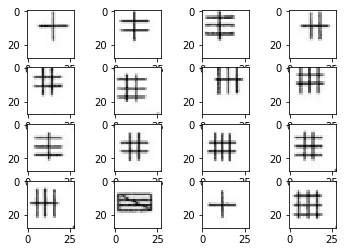

In [13]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,3],cmap='gray')

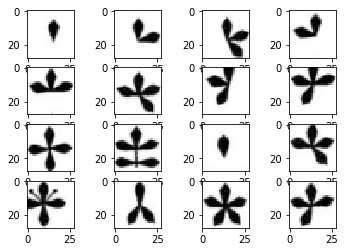

In [14]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,4],cmap='gray')

In [15]:
n=0
from con import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([0,3,6])
#M12,a12=load(data[:,:,m,12])
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,0,4])

Step 1, Minibatch Loss= 13.9630, Train Accuracy= 0.125
Step 2, Minibatch Loss= 11.2719, Train Accuracy= 0.250
Step 3, Minibatch Loss= 12.3039, Train Accuracy= 0.125
Step 4, Minibatch Loss= 11.4100, Train Accuracy= 0.125
Step 5, Minibatch Loss= 9.0107, Train Accuracy= 0.250
Step 6, Minibatch Loss= 10.9570, Train Accuracy= 0.000
Step 7, Minibatch Loss= 7.4499, Train Accuracy= 0.250
Step 8, Minibatch Loss= 7.7601, Train Accuracy= 0.125
Step 9, Minibatch Loss= 5.8545, Train Accuracy= 0.250
Step 10, Minibatch Loss= 4.3665, Train Accuracy= 0.375
Step 11, Minibatch Loss= 3.0865, Train Accuracy= 0.500
Step 12, Minibatch Loss= 4.0150, Train Accuracy= 0.250
Step 13, Minibatch Loss= 3.9475, Train Accuracy= 0.125
Step 14, Minibatch Loss= 3.1885, Train Accuracy= 0.125
Step 15, Minibatch Loss= 2.1216, Train Accuracy= 0.250
Step 16, Minibatch Loss= 1.0222, Train Accuracy= 0.500
Step 17, Minibatch Loss= 0.8497, Train Accuracy= 0.375
Step 18, Minibatch Loss= 0.4117, Train Accuracy= 0.500
Step 19, Minib

In [16]:
II=forward(data[:,:,:,0],w1,w2)
error01=II[1,:]-II[0,:]
error12=II[2,:]-II[1,:]
error34=II[4,:]-II[3,:]
error54=II[5,:]-II[4,:]
error67=II[7,:]-II[6,:]
error78=np.zeros((8,294))
for i in range (0,8):
    error78[i,:]=II[8+i,:]-II[7,:]
E1=error01-error34
E2=error34-error54
E3=np.zeros((8,294))
for i in range (0,8):
    E3[i,:]=error67-error78[i,:]
EE1=E2-E1
EE2=np.zeros((8,294))
for i in range (0,8):
    EE2[i,:]=E3[i,:]-E2
np.abs(EE2.sum(axis=1))

array([182.58678083, 415.75591336, 209.96831032, 297.76133913,
       210.92498331, 313.15856869, 279.27490681, 117.98128023])

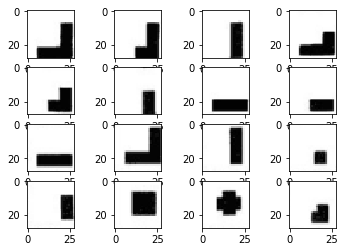

In [17]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,5],cmap='gray')

In [19]:
n=5
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([2,6])
#M12,a12=load(data[:,:,m,12])
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,n],50,3,8)

Step 1, Minibatch Loss= 21160.0430, Train Accuracy= 0.000
Step 2, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 3, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 4, Minibatch Loss= 12584.0537, Train Accuracy= 0.000
Step 5, Minibatch Loss= 11367.7393, Train Accuracy= 0.000
Step 6, Minibatch Loss= 189.9936, Train Accuracy= 0.875
Step 7, Minibatch Loss= 1184.1997, Train Accuracy= 0.625
Step 8, Minibatch Loss= 409.0261, Train Accuracy= 0.750
Step 9, Minibatch Loss= 3899.4885, Train Accuracy= 0.125
Step 10, Minibatch Loss= 3224.7622, Train Accuracy= 0.125
Step 11, Minibatch Loss= 542.7594, Train Accuracy= 0.750
Step 12, Minibatch Loss= 1405.9449, Train Accuracy= 0.500
Step 13, Minibatch Loss= 1019.1259, Train Accuracy= 0.625
Step 14, Minibatch Loss= 943.0934, Train Accuracy= 0.500
Step 15, Minibatch Loss= 2184.0259, Train Accuracy= 0.625
Step 16, Minibatch Loss= 973.5374, Train Accuracy= 0.375
Step 17, Minibatch Loss= 943.9087, Train Accuracy= 0.625
Step 18, Minibatch Loss= 532.811

In [20]:
II=forward(data[:,:,:,0],w1,w2)
error01=II[1,:]-II[0,:]
error12=II[2,:]-II[1,:]
error34=II[4,:]-II[3,:]
error54=II[5,:]-II[4,:]
error67=II[7,:]-II[6,:]
error78=np.zeros((8,294))
for i in range (0,8):
    error78[i,:]=II[8+i,:]-II[7,:]
E1=error01-error34
E2=error34-error54
E3=np.zeros((8,294))
for i in range (0,8):
    E3[i,:]=error67-error78[i,:]
EE1=E2-E1
EE2=np.zeros((8,294))
for i in range (0,8):
    EE2[i,:]=E3[i,:]-E2
np.abs(EE2.sum(axis=1))

array([196.15233554, 600.34419572, 133.37156104, 274.30550747,
       205.08774243, 394.03483695, 173.22646553,  10.91509143])

In [22]:
n=5
from con1 import train_cov
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
#from loadone1 import load_sample as load
w1=np.zeros((5,5,1,3))
w2=np.zeros((5,5,3,6))
m=np.array([2,6,11])
#M12,a12=load(data[:,:,m,12])
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data[:,:,m,n],50,3,8)

Step 1, Minibatch Loss= 9627.5576, Train Accuracy= 0.000
Step 2, Minibatch Loss= 426.5479, Train Accuracy= 0.750
Step 3, Minibatch Loss= 5710.3320, Train Accuracy= 0.125
Step 4, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 5, Minibatch Loss= 72.4109, Train Accuracy= 0.875
Step 6, Minibatch Loss= 12444.1270, Train Accuracy= 0.000
Step 7, Minibatch Loss= 12757.6582, Train Accuracy= 0.000
Step 8, Minibatch Loss= 2316.6460, Train Accuracy= 0.250
Step 9, Minibatch Loss= 260.6835, Train Accuracy= 0.875
Step 10, Minibatch Loss= 1994.4563, Train Accuracy= 0.250
Step 11, Minibatch Loss= 2175.3538, Train Accuracy= 0.375
Step 12, Minibatch Loss= 9851.2656, Train Accuracy= 0.000
Step 13, Minibatch Loss= 1627.0967, Train Accuracy= 0.125
Step 14, Minibatch Loss= 4330.1084, Train Accuracy= 0.125
Step 15, Minibatch Loss= 0.0000, Train Accuracy= 1.000


In [23]:
II=forward(data[:,:,:,0],w1,w2)
error01=II[1,:]-II[0,:]
error12=II[2,:]-II[1,:]
error34=II[4,:]-II[3,:]
error54=II[5,:]-II[4,:]
error67=II[7,:]-II[6,:]
error78=np.zeros((8,294))
for i in range (0,8):
    error78[i,:]=II[8+i,:]-II[7,:]
E1=error01-error34
E2=error34-error54
E3=np.zeros((8,294))
for i in range (0,8):
    E3[i,:]=error67-error78[i,:]
EE1=E2-E1
EE2=np.zeros((8,294))
for i in range (0,8):
    EE2[i,:]=E3[i,:]-E2
np.abs(EE2.sum(axis=1))

array([ 69.94509773, 240.90451933, 209.07068697, 297.25111495,
       162.08785287, 227.53341306, 259.631894  ,  15.73571185])

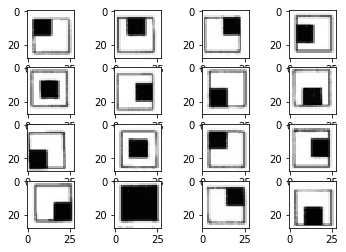

In [24]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,6],cmap='gray')

In [26]:
data_f=np.zeros((28,28,2))
data_f1=data[:,:,9,6].copy()
data_f1[6:22,6:22]=255
data_f[:,:,0]=data_f1
data_f2=data[:,:,9,6].copy()
data_f2[1:6,:]=255
data_f2[:,1:6]=255
data_f2[:,22:28]=255
data_f2[22:28,:]=255
data_f[:,:,1]=data_f2
w1[:,:,:,:],w2[:,:,:,:]=train_cov(data_f,50,3,8)
II=forward(data[:,:,:,0],w1,w2)
error01=II[1,:]-II[0,:]
error12=II[2,:]-II[1,:]
error34=II[4,:]-II[3,:]
error54=II[5,:]-II[4,:]
error67=II[7,:]-II[6,:]
error78=np.zeros((8,294))
for i in range (0,8):
    error78[i,:]=II[8+i,:]-II[7,:]
E1=error01-error34
E2=error34-error54
E3=np.zeros((8,294))
for i in range (0,8):
    E3[i,:]=error67-error78[i,:]
EE1=E2-E1
EE2=np.zeros((8,294))
for i in range (0,8):
    EE2[i,:]=E3[i,:]-E2
np.abs(EE2.sum(axis=1))

Step 1, Minibatch Loss= 0.0000, Train Accuracy= 1.000
Step 2, Minibatch Loss= 1795.0217, Train Accuracy= 0.375
Step 3, Minibatch Loss= 784.9329, Train Accuracy= 0.625
Step 4, Minibatch Loss= 900.2399, Train Accuracy= 0.625
Step 5, Minibatch Loss= 254.6121, Train Accuracy= 0.750
Step 6, Minibatch Loss= 1617.3240, Train Accuracy= 0.625
Step 7, Minibatch Loss= 1005.0013, Train Accuracy= 0.625
Step 8, Minibatch Loss= 162.2014, Train Accuracy= 0.750
Step 9, Minibatch Loss= 189.7282, Train Accuracy= 0.750
Step 10, Minibatch Loss= 629.6924, Train Accuracy= 0.625
Step 11, Minibatch Loss= 686.3468, Train Accuracy= 0.750
Step 12, Minibatch Loss= 364.7160, Train Accuracy= 0.750
Step 13, Minibatch Loss= 527.8068, Train Accuracy= 0.500
Step 14, Minibatch Loss= 751.2481, Train Accuracy= 0.500
Step 15, Minibatch Loss= 509.7042, Train Accuracy= 0.750
Step 16, Minibatch Loss= 1073.5361, Train Accuracy= 0.500
Step 17, Minibatch Loss= 670.9858, Train Accuracy= 0.625
Step 18, Minibatch Loss= 1921.3970, Tr

array([105.51971867,  59.9078332 , 187.91257398, 221.95657677,
       114.31763964, 117.25788072, 219.20551227,  85.44531596])

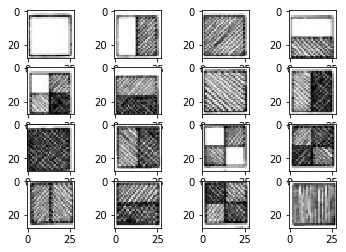

In [2]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('data.npy')
for i in range (0,16):
    plt.subplot(4,4,i+1)
    plt.imshow(data[:,:,i,7],cmap='gray')

In [4]:
np.load('Data/9_6cTermination_all.npy')

array(4)